In [26]:
baseball = pd.read_csv("01 - Handling data/Data/baseball.csv", index_col='id')
segments = pd.read_csv("01 - Handling data/Data/transit_segments.csv")
cdystonia = pd.read_csv("01 - Handling data/Data/cdystonia.csv", index_col=None)
vessels = pd.read_csv("01 - Handling data/Data/vessel_information.csv", index_col='mmsi')

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')

# 1 - Handling Data

In [28]:
bacteria = pd.Series([632, 1638, 569, 115],
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [29]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria',
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


### Get DF

In [30]:
type(data[['value']])

pandas.core.frame.DataFrame

### Get Serie

In [31]:
type(data.value)

pandas.core.series.Series

### Get Row

In [32]:
# With labels as index
data.loc[3]

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

In [33]:
#With integer location as index
data.iloc[3]

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

In [34]:
baseball.loc[89347, ['h','X2b', 'X3b', 'hr']]

h      126
X2b     18
X3b      3
hr       4
Name: 89347, dtype: object

In [35]:
baseball.loc[:89347, 'hr']

id
88641     1
88643     0
88645     0
88649     0
88650     0
88652     6
88653    15
88662     0
89177     0
89178     1
89330    10
89333     0
89334     1
89335     0
89336     0
89337     4
89338     0
89339     0
89340     0
89341     0
89343     0
89345     0
89347     4
Name: hr, dtype: int64

In [36]:
baseball.iloc[:5, 5:8]

,g,ab,r
id,,,
88641,19,50,6
88643,31,2,0
88645,62,0,0
88649,20,3,0
88650,33,6,0


### Copy to not have a view of the DF

In [37]:
vals = data.value.copy()

### Filter DF

In [38]:
data[data['phylum'].apply(lambda x: x.endswith('bacteria')) & data['value'].apply(lambda x: x>1000)]

,value,patient,phylum
1,1638,1,Proteobacteria
5,1130,2,Proteobacteria


### Drop a line or a row

In [39]:
treatment = pd.Series([0]*4 + [1]*2)
data['treatment'] = treatment
#Columns
data_nomonth = data.drop('treatment', axis=1)
#Rows
data_nomonth.drop(0)
#na
data.dropna(how='all') #how=all make it drop only if all col as nan

,value,patient,phylum,treatment
0,632,1,Firmicutes,0.0
1,1638,1,Proteobacteria,0.0
2,569,1,Actinobacteria,0.0
3,115,1,Bacteroidetes,0.0
4,433,2,Firmicutes,1.0
5,1130,2,Proteobacteria,1.0
6,754,2,Actinobacteria,NaN
7,555,2,Bacteroidetes,NaN


### Have a look at external CSV

In [40]:
!head Data/microbiome.csv

head: cannot open 'Data/microbiome.csv' for reading: No such file or directory


### Load CSV

In [41]:
pd.read_csv("01 - Handling data/Data/microbiome.csv",
            header=None, #Don't use the first line of the csv as column index
            sep='\s+',#separator are whitespaces
            index_col=['Patient','Taxon'], #use Patient and Taxon as index
            skiprows=[3,4,6],#Don't load those line from csv
            nrows=10,#Only load 10 first rows of csv
            na_values=['?', -99999], #specify the char ? and number -99999 to be considered as NA
            )

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\xagao\AppData\Local\Temp\ipykernel_27628\3948407883.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',#separator are whitespaces


ValueError: Index Patient invalid

### Load Excel

In [42]:
df = pd.read_excel('01 - Handling data/Data/microbiome_MID2.xls', sheet_name='Sheet 1', header=None)

### Check if index is unique

In [43]:
df.index.is_unique

True

### Query a DF

In [44]:
min_ab = 500

baseball.query('ab > @min_ab')
grass_pokemon = pokemon_df.query("(`Class 1` == 'Grass' & `Class 2` != 'Rock') | (`Class 2` == 'Grass' & `Class 1` != 'Rock')" )

NameError: name 'pokemon_df' is not defined

### Operations

In [45]:
len(baseball[baseball.team.isin(['LAN', 'SFN'])])

15

In [46]:
hr2007 = baseball.loc[baseball.year==2007, 'hr']
hr2007[hr2007.notnull()]

id
89177     0
89178     1
89330    10
89333     0
89334     1
         ..
89525     0
89526     0
89530     3
89533    13
89534     0
Name: hr, Length: 92, dtype: int64

In [47]:
hr2006 = baseball.loc[baseball.year==2006, 'hr']
hr2007.add(hr2006, fill_value=0).head(20) # Fill Nan value as 0.0

id
88641     1.0
88643     0.0
88645     0.0
88649     0.0
88650     0.0
88652     6.0
88653    15.0
88662     0.0
89177     0.0
89178     1.0
89330    10.0
89333     0.0
89334     1.0
89335     0.0
89336     0.0
89337     4.0
89338     0.0
89339     0.0
89340     0.0
89341     0.0
Name: hr, dtype: float64

In [48]:
(baseball.hr - baseball.hr.max()).head(20)

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
89177   -35
89178   -34
89330   -25
89333   -35
89334   -34
89335   -35
89336   -35
89337   -31
89338   -35
89339   -35
89340   -35
89341   -35
Name: hr, dtype: int64

In [49]:
baseball['obp']=baseball.apply(lambda p: (p.h+p.bb+p.hbp)/(p.ab+p.bb+p.hbp+p.sf) if (p.ab+p.bb+p.hbp+p.sf) != 0.0 else 0.0, axis=1)

In [50]:
bacteria.fillna(0)

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

In [51]:
data.fillna({'year': 2013, 'treatment':2})

,value,patient,phylum,treatment
0,632,1,Firmicutes,0.0
1,1638,1,Proteobacteria,0.0
2,569,1,Actinobacteria,0.0
3,115,1,Bacteroidetes,0.0
4,433,2,Firmicutes,1.0
5,1130,2,Proteobacteria,1.0
6,754,2,Actinobacteria,2.0
7,555,2,Bacteroidetes,2.0


In [52]:
data['treatment'].fillna(2, inplace=True)
data

,value,patient,phylum,treatment
0,632,1,Firmicutes,0.0
1,1638,1,Proteobacteria,0.0
2,569,1,Actinobacteria,0.0
3,115,1,Bacteroidetes,0.0
4,433,2,Firmicutes,1.0
5,1130,2,Proteobacteria,1.0
6,754,2,Actinobacteria,2.0
7,555,2,Bacteroidetes,2.0


In [53]:
bacteria.fillna(method='bfill') #Fill by interpolation

C:\Users\xagao\AppData\Local\Temp\ipykernel_27628\2655686349.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bacteria.fillna(method='bfill') #Fill by interpolation


Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

### Sorting

In [54]:
baseball.sort_index(ascending=False, axis=1)

,year,team,stint,so,sh,sf,sb,rbi,r,player,...,hr,hbp,h,gidp,g,cs,bb,ab,X3b,X2b
id,,,,,,,,,,,,,,,,,,,,,
88641,2006,CHN,2,4.0,3.0,0.0,1.0,2.0,6,womacto01,...,1,0.0,14,0.0,19,1.0,4,50,0,1
88643,2006,BOS,1,1.0,0.0,0.0,0.0,0.0,0,schilcu01,...,0,0.0,1,0.0,31,0.0,0,2,0,0
88645,2006,NYA,1,0.0,0.0,0.0,0.0,0.0,0,myersmi01,...,0,0.0,0,0.0,62,0.0,0,0,0,0
88649,2006,MIL,1,2.0,0.0,0.0,0.0,0.0,0,helliri01,...,0,0.0,0,0.0,20,0.0,0,3,0,0
88650,2006,NYA,1,4.0,0.0,0.0,0.0,0.0,0,johnsra05,...,0,0.0,1,0.0,33,0.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89525,2007,FLO,2,0.0,0.0,0.0,0.0,0.0,0,benitar01,...,0,0.0,0,0.0,34,0.0,0,0,0,0
89526,2007,SFN,1,0.0,0.0,0.0,0.0,0.0,0,benitar01,...,0,0.0,0,0.0,19,0.0,0,0,0,0
89530,2007,HOU,1,74.0,4.0,1.0,6.0,25.0,38,ausmubr01,...,3,6.0,82,11.0,117,1.0,37,349,3,16


In [55]:
baseball[['player','sb','cs']].sort_values(ascending=[False,True],
                                           by=['sb', 'cs']).head(10)

,player,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0
89530,ausmubr01,6.0,1.0
89466,gonzalu01,6.0,2.0
89521,bondsba01,5.0,0.0


### Summarization

In [56]:
baseball.mean(numeric_only=True, axis=1)

id
88641    105.716667
88643    102.125000
88645    103.450000
88649    101.600000
88650    102.558333
            ...    
89525    102.150000
89526    101.350000
89530    139.215903
89533    137.569583
89534    102.306818
Length: 100, dtype: float64

In [57]:
baseball.hr.cov(baseball.X2b)

69.07646464646454

### Plot

<Axes: >

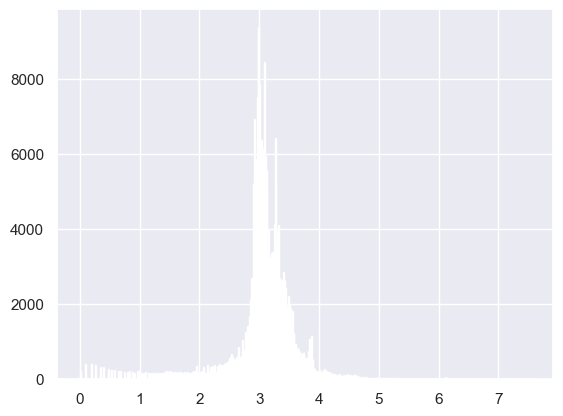

In [58]:
segments.seg_length.apply(np.log).hist(bins=500)

### Parse Date

In [59]:
segments = pd.read_csv("01 - Handling data/Data/transit_segments.csv", parse_dates=['st_time', 'end_time'], date_format='%m/%d/%y %H:%M', nrows=1000)

### Merge

In [60]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)),
                        score=np.random.random(size=6)))

pd.merge(df1, df2, how='outer')

,id,age,score
0,0,30,0.093788
1,0,30,0.737766
2,1,30,0.304246
3,1,30,0.909712
4,2,29,0.457985
5,2,29,0.862435
6,3,28,NaN


### Concatenation

In [61]:
mb1 = pd.read_excel('01 - Handling data/Data/microbiome_MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('01 - Handling data/Data/microbiome_MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.columns = mb2.columns = ['Count']
mb1.index.name = mb2.index.name = 'Taxon'

pd.concat([mb1, mb2], axis=1) #axis = 1 -> column-wise

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0
...,...,...
"Bacteria ""Proteobacteria"" Gammaproteobacteria Oceanospirillales Oceanospirillales_incertae_sedis Spongiispira",NaN,1.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Hydrogenovibrio",NaN,9.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Sulfurivirga",NaN,1.0


### Reshape

In [62]:
data.stack() #.unstack() to undo

0  value                   632
   patient                   1
   phylum           Firmicutes
   treatment               0.0
1  value                  1638
   patient                   1
   phylum       Proteobacteria
   treatment               0.0
2  value                   569
   patient                   1
   phylum       Actinobacteria
   treatment               0.0
3  value                   115
   patient                   1
   phylum        Bacteroidetes
   treatment               0.0
4  value                   433
   patient                   2
   phylum           Firmicutes
   treatment               1.0
5  value                  1130
   patient                   2
   phylum       Proteobacteria
   treatment               1.0
6  value                   754
   patient                   2
   phylum       Actinobacteria
   treatment               2.0
7  value                   555
   patient                   2
   phylum        Bacteroidetes
   treatment               2.0
dtype: o

In [63]:
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [64]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc="max").head(10)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57

In [65]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


### Drop Duplicated

In [66]:
df.drop_duplicates(['names'])

KeyError: Index(['names'], dtype='object')

### Values Replacements

In [67]:
cdystonia['treatment'] = cdystonia.treat.map({'Placebo': 0, '5000U': 1, '10000U': 2})
cdystonia.treat.replace({0:'Placebo', 1:'5000U', 2:'10000U'}).head(10)

0     5000U
1     5000U
2     5000U
3     5000U
4     5000U
5     5000U
6    10000U
7    10000U
8    10000U
9    10000U
Name: treat, dtype: object

### Categorical Data

In [68]:
# Indicator Values
pd.get_dummies(vessels.head(10).type)

,Dredging/MilOps/Reserved/Towing,Other,Pleasure/Tug,Tanker/Unknown,Towing,Tug,Unknown
mmsi,,,,,,,
1,True,False,False,False,False,False,False
9,False,False,True,False,False,False,False
21,False,False,False,False,False,False,True
74,False,False,False,False,False,False,True
103,False,False,False,True,False,False,False
310,False,False,False,False,False,False,True
3011,False,True,False,False,False,False,False
4731,False,False,False,False,False,False,True
15151,False,False,False,False,False,True,False


In [69]:
pd.Categorical(cdystonia.treat)

['5000U', '5000U', '5000U', '5000U', '5000U', ..., '5000U', '5000U', '5000U', '5000U', '5000U']
Length: 631
Categories (3, object): ['10000U', '5000U', 'Placebo']

In [70]:
cdystonia['treat'] = cdystonia.treat.astype('category')
cdystonia.treat.describe()

count        631
unique         3
top       10000U
freq         213
Name: treat, dtype: object

In [71]:
cdystonia.treat.cat.codes.head(20) # Category object mapped to int

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    2
dtype: int8

### Discretization

In [72]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:20]

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
5     (60, 70]
6     (60, 70]
7     (60, 70]
8     (60, 70]
9     (60, 70]
10    (60, 70]
11    (60, 70]
12    (60, 70]
13    (60, 70]
14    (60, 70]
15    (60, 70]
16    (60, 70]
17    (60, 70]
18    (50, 60]
19    (50, 60]
Name: age, dtype: category
Categories (7, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

In [73]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:20] #specify where to open interval

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
12    [60, 70)
13    [60, 70)
14    [60, 70)
15    [60, 70)
16    [60, 70)
17    [60, 70)
18    [50, 60)
19    [50, 60)
Name: age, dtype: category
Categories (7, interval[int64, left]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

In [74]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:20]

0             old
1             old
2             old
3             old
4             old
5             old
6             old
7             old
8             old
9             old
10            old
11            old
12            old
13            old
14            old
15            old
16            old
17            old
18    middle-aged
19    middle-aged
Name: age, dtype: category
Categories (4, object): ['young' < 'middle-aged' < 'old' < 'really old']

In [75]:
pd.qcut(cdystonia.age, 4)[:20] #4 quantiles

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
5     (56.0, 65.0]
6     (65.0, 83.0]
7     (65.0, 83.0]
8     (65.0, 83.0]
9     (65.0, 83.0]
10    (65.0, 83.0]
11    (65.0, 83.0]
12    (56.0, 65.0]
13    (56.0, 65.0]
14    (56.0, 65.0]
15    (56.0, 65.0]
16    (56.0, 65.0]
17    (56.0, 65.0]
18    (56.0, 65.0]
19    (56.0, 65.0]
Name: age, dtype: category
Categories (4, interval[float64, right]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

In [76]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1]) #custom quantiles
quantiles[:20]

0     (1.7, 455.8]
1     (1.7, 455.8]
2     (1.7, 455.8]
3     (1.7, 455.8]
4     (1.7, 455.8]
5     (1.7, 455.8]
6     (1.7, 455.8]
7     (1.7, 455.8]
8     (1.7, 455.8]
9     (1.7, 455.8]
10    (1.7, 455.8]
11    (1.7, 455.8]
12    (1.7, 455.8]
13    (1.7, 455.8]
14    (1.7, 455.8]
15    (1.7, 455.8]
16    (1.7, 455.8]
17    (1.7, 455.8]
18    (1.7, 455.8]
19    (1.7, 455.8]
Name: seg_length, dtype: category
Categories (5, interval[float64, right]): [(0.999, 1.1] < (1.1, 1.7] < (1.7, 455.8] < (455.8, 456.801] < (456.801, 701.6]]

### Take random samples

In [77]:
vessels.sample(n=10, replace=True) #weights = df['TotalPop'] can sample with weight

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
210021000,2,Mv Pontoklydon/Pontoklydon,N,Cyprus (Republic of),Foreign,1,169.0,169.0,1,Cargo
371671000,1,Grand Legacy,N,Panama (Republic of),Foreign,1,199.0,199.0,1,Cargo
319166000,1,Ice River,N,Cayman Islands,Foreign,1,145.0,145.0,1,Cargo
356771000,1,Boronia K,N,Panama (Republic of),Foreign,1,180.0,180.0,1,Cargo
376623000,1,Palanga Spirit,N,Saint Vincent and the Grenadines,Foreign,1,99.0,99.0,1,Cargo
367026030,1,Isabel Mcallister,N,United States of America,Domestic,1,30.0,30.0,2,Towing/Tug
353090000,1,Marianne Stoeger,N,Panama (Republic of),Foreign,1,229.0,229.0,1,Cargo
357827000,1,Lotus Express,N,Panama (Republic of),Foreign,2,179.0/180.0,180.0,1,Tanker
310438000,1,Sun Princess,N,Bermuda,Foreign,1,261.0,261.0,1,Passenger


### Aggregate and GroupBy

In [78]:
cdystonia_grouped = cdystonia.drop(columns=['treat', 'sex']).groupby(cdystonia.patient)
cdystonia_grouped.agg('mean').head()
cdystonia_grouped.mean().head() #equivalent
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean,treatment_mean
patient,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


In [79]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5).head(10)

patient
1     34.0
2     50.5
3     30.5
4     61.5
5     48.5
6     48.0
7     42.0
8     32.5
9     35.5
10    20.5
Name: twstrs, dtype: float64

In [80]:
cdystonia.drop(columns=['treat', 'sex']).groupby(['week','site']).mean().head()

patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5  1.0  6.5  59.000000  43.083333   1.000000
     2        19.5  1.0  7.5  53.928571  51.857143   0.928571
     3        32.5  1.0  6.5  51.500000  38.750000   1.000000
     4        42.5  1.0  4.5  59.250000  48.125000   1.000000
     5        49.5  1.0  3.5  51.833333  49.333333   1.000000

In [81]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

In [82]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments.head(15)

names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4

In [83]:
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean','size']) #Can aggregate on multiples functions
average_by_region.sort_values("mean", ascending=False)

NameError: name 'country_features' is not defined

In [84]:
for idx, row in country_features[country_features.literacy==100].iterrows(): # iterrows super useful
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score))

NameError: name 'country_features' is not defined

# 2 - Data from the Web

In [85]:
import requests
import math
from bs4 import BeautifulSoup

In [86]:
r = requests.get('https://httpbin.org/html')
# Extract the header
soup = BeautifulSoup(r.text, 'html.parser')
soup.h1

<h1>Herman Melville - Moby-Dick</h1>

In [87]:
all_links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(all_links)))
external_links = 0
for link in all_links:
    if (link.get('href') and not link.get('href').startswith('http://dblp.uni-trier.de/')
            and link.get('href').startswith('http')):  # just an example, you may need more checks
        external_links += 1

print('... and {0} of them point to external websites.'.format(external_links))

The webpage cointains 0 links...
... and 0 of them point to external websites.


# 2 - Data Viz

In [88]:
DATA_FOLDER = '01 - Handling data/Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)
happiness['country_name'] = happiness['country'].apply(lambda r: r.lower())
country_features = happiness.merge(countries, on="country_name").drop("country_name", axis=1)

data_folder = '02 - Data viz and data from the web/Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

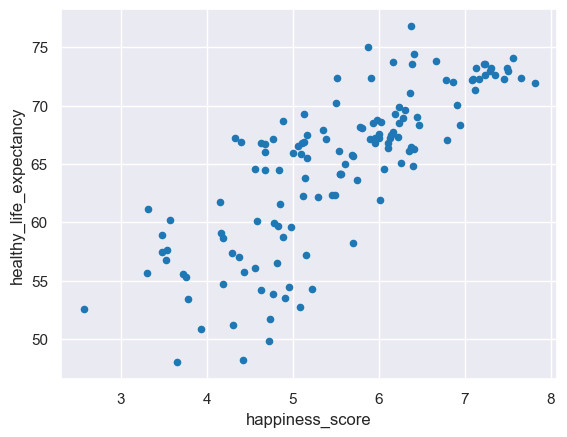

In [89]:
country_features.plot(x="happiness_score", y="healthy_life_expectancy", kind="scatter")

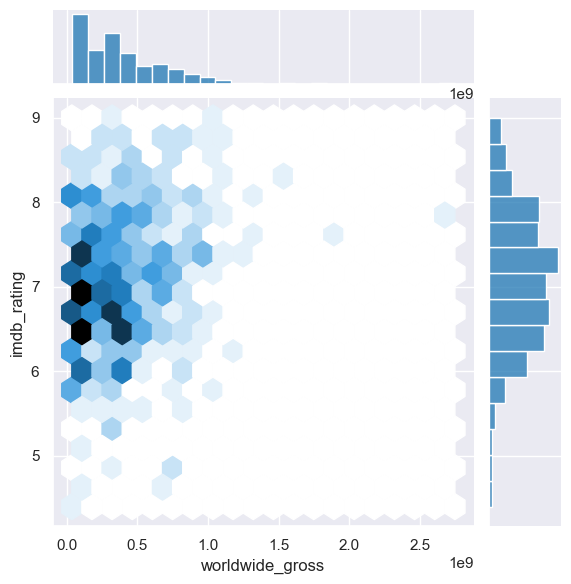

In [90]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")

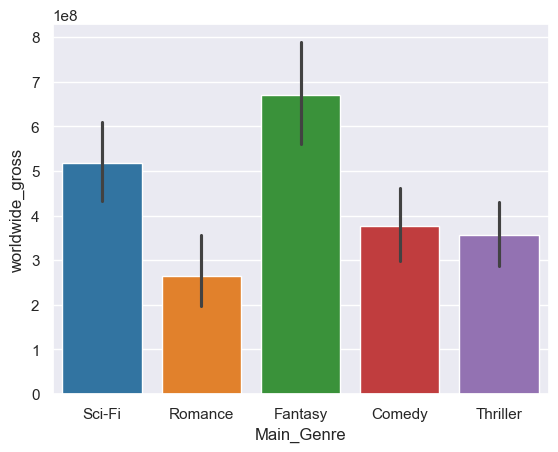

In [91]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross",hue="Main_Genre", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

Text(0, 0.6, 'Number of movies')

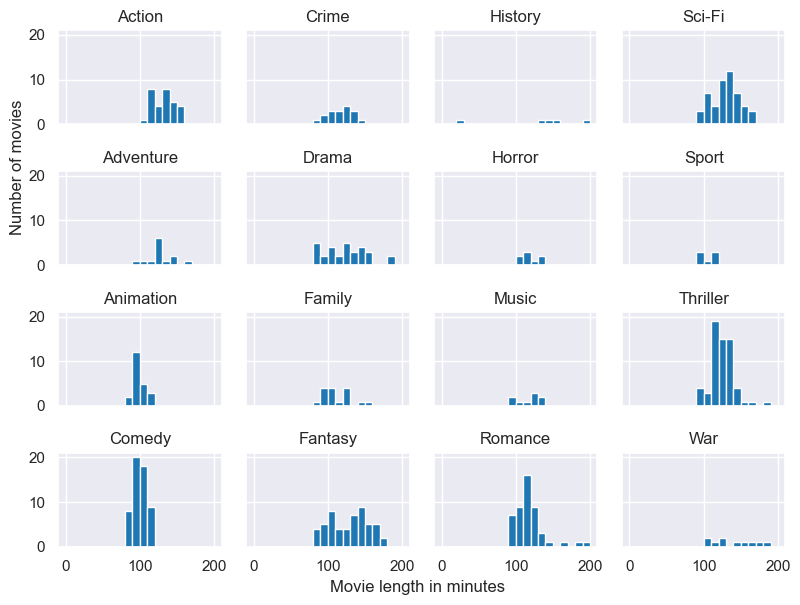

In [92]:
stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({
    'length': x['length'].values
}))
# Write your code to make 4x4 panel here

fig, ax = plt.subplots(4, 4, figsize=(8, 6), sharey=True, sharex=True)

for i in range(16):
    sbplt = ax[i % 4, math.floor(i / 4)]
    sbplt.hist(stats_by_genre.iloc[i].values, range=[0, 200], bins=20)
    sbplt.set_title(stats_by_genre.index[i])

fig.tight_layout()

fig.text(0.4, 0, "Movie length in minutes")
fig.text(0, 0.6, "Number of movies", rotation=90)

# 3 - Describing data

In [93]:
from statsmodels.stats import diagnostic
from scipy import stats

In [94]:
data_folder = '03 - Describing data/data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

### Distribution?

In [95]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')#how about exponential? dist = 'exp'

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

### Correlation

In [96]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.2646136320394489, pvalue=9.942215354239015e-53)

There is a small (0.26), but significant (p < 0.05) positive correlation.

In [97]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

significant (p < 0.05)

### Hypothesis testing

In [98]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### Bootstrapping

In [99]:
def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.

    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate

    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    means = np.zeros(iterations)

    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(bootstrap_sample)

    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)

    return (lower_bound, upper_bound)